In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("Diwali Sales Data.csv", encoding = 'unicode_escape')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#drop unrelated/blank columns
df = df.drop(columns=["Status","unnamed1"])

In [7]:
# check for null values
df.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
# drop all null values now
df.dropna(inplace = True)

In [9]:
# check for null values
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [10]:
# change dtype of Amount
df["Amount"]= df["Amount"].astype(int)

In [11]:
df["Amount"].dtype

dtype('int64')

In [12]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
df[["Orders","Amount"]].describe()

,Orders,Amount
count,11239.000000,11239.000000
mean,2.489634,9453.610553
std,1.114967,5222.355168
min,1.000000,188.000000
25%,2.000000,5443.000000
50%,2.000000,8109.000000
75%,3.000000,12675.000000
max,4.000000,23952.000000


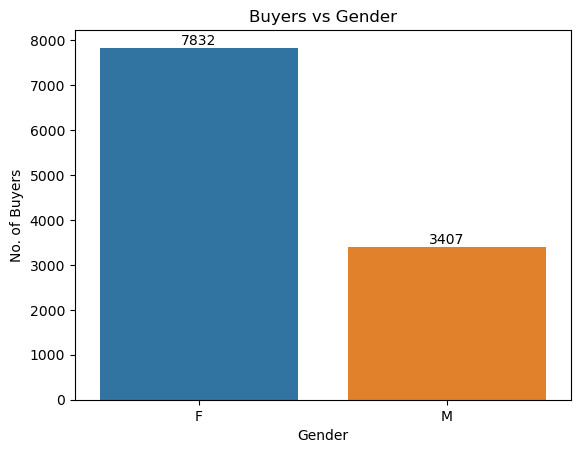

In [17]:
# plot a bar chart to see the count of products ordered by each gender
plt.ylabel("No. of Buyers")
plt.title("Buyers vs Gender")
ax = sns.countplot(data = df, x="Gender", hue="Gender")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

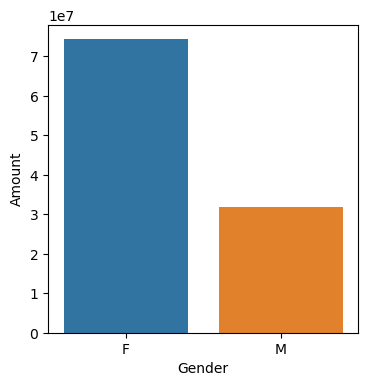

In [18]:
# plotting a bar chart of gender vs amount spent
sales_gen = df.groupby("Gender", as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending=False)
plt.figure(figsize=(4,4))
sns.barplot(x="Gender", y="Amount", data=sales_gen, hue="Gender")
plt.show()

##### From above we can see that Females have placed more orders than Males and also their purchasing power is greater than Males.

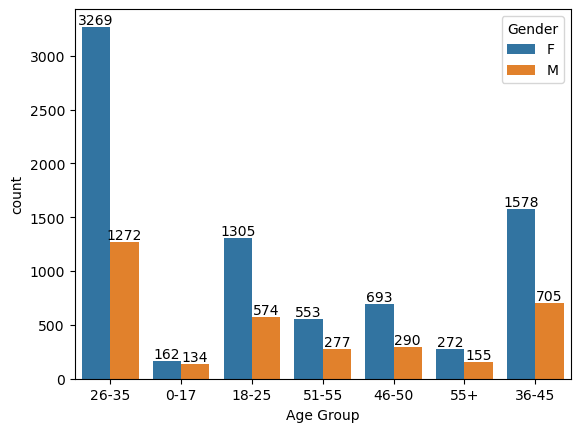

In [19]:
# plot a bar chart to see the count of products ordered by each Age group

ax = sns.countplot(data = df, x="Age Group", hue="Gender")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

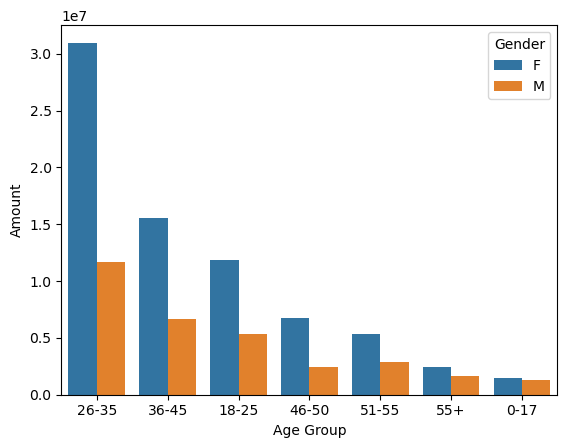

In [20]:
# plotting a bar chart of Age Group vs amount spent
sales_age_group = df.groupby(["Age Group","Gender"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending=False)
sns.barplot(x="Age Group", y="Amount", data=sales_age_group, hue="Gender")
plt.show()

#####  Age Group 26-35yrs female are placing more orders and their purchasing power is also greatest than other buyers. 

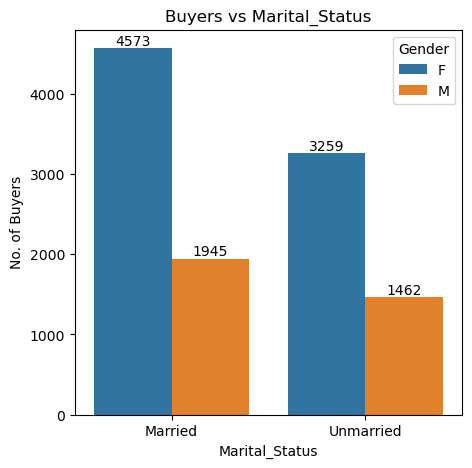

In [21]:
# plot a bar chart to see the count of products distinguished by Marital status
plt.figure(figsize=(5,5))
plt.ylabel("No. of Buyers")
plt.title("Buyers vs Marital_Status")
ax = sns.countplot(data = df, x = "Marital_Status", hue="Gender")
# First argument: current positions [0, 1]
# Second argument: new labels ['Married', 'Unmarried']
plt.xticks([0, 1], ['Married', 'Unmarried'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

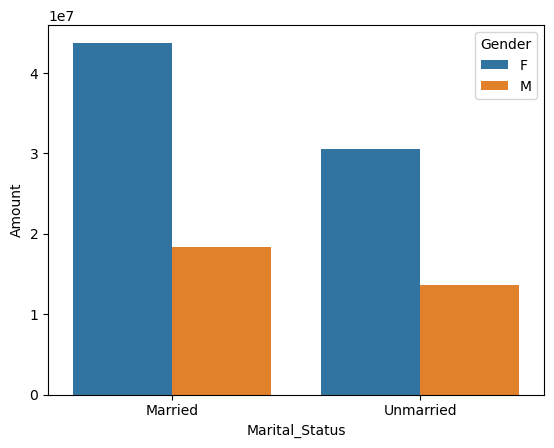

In [22]:
# plotting a bar chart of Marital Status vs amount spent
sales_marital_status = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False) 
plt.xticks([0,1],['Married','Unmarried'])
sns.barplot(data=sales_marital_status, x='Marital_Status', y='Amount', hue="Gender")
plt.show()

##### Above graphs depict that most of the buyers are married females and their purchasing power is more than others.

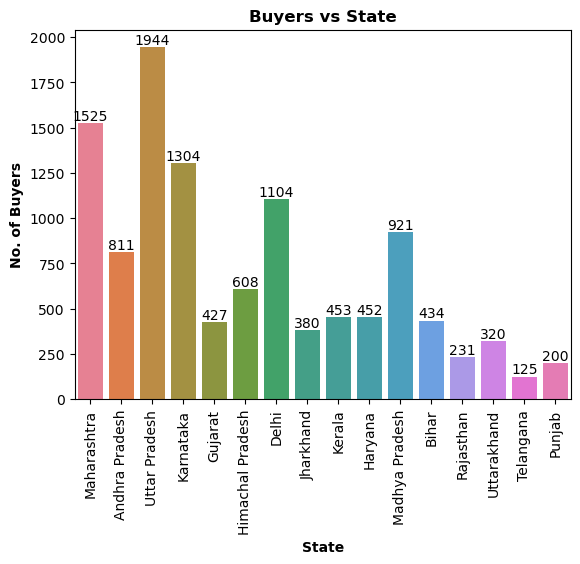

<Figure size 1000x1000 with 0 Axes>

In [23]:
## plot a bar chart to see the count of products ordered from each state
plt.ylabel("No. of Buyers", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.title("Buyers vs State", fontweight="bold")
plt.xticks(fontsize=10,  rotation=90)
ax = sns.countplot(data = df, x="State", hue="State")
for bars in ax.containers:
    ax.bar_label(bars)
plt.figure(figsize=(10,10))    
plt.show()

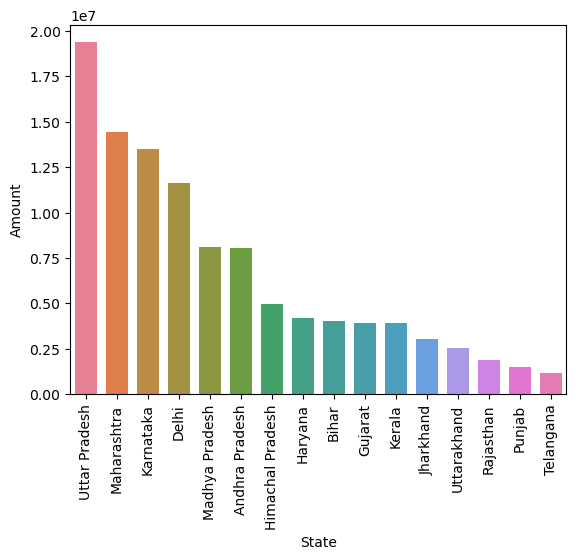

In [24]:
# plotting a bar chart of State vs amount spent
sales_state = df.groupby('State', as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False) 
plt.xticks(rotation=90)
plt.grid(False)
plt.style.use("ggplot")
sns.barplot(data=sales_state, x='State', y='Amount', hue="State", width=0.7)
plt.show()

##### Buyers from Uttar Pradesh are in large number and their purchase power is also high.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20060\3985243263.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x="Occupation", palette = "viridis")


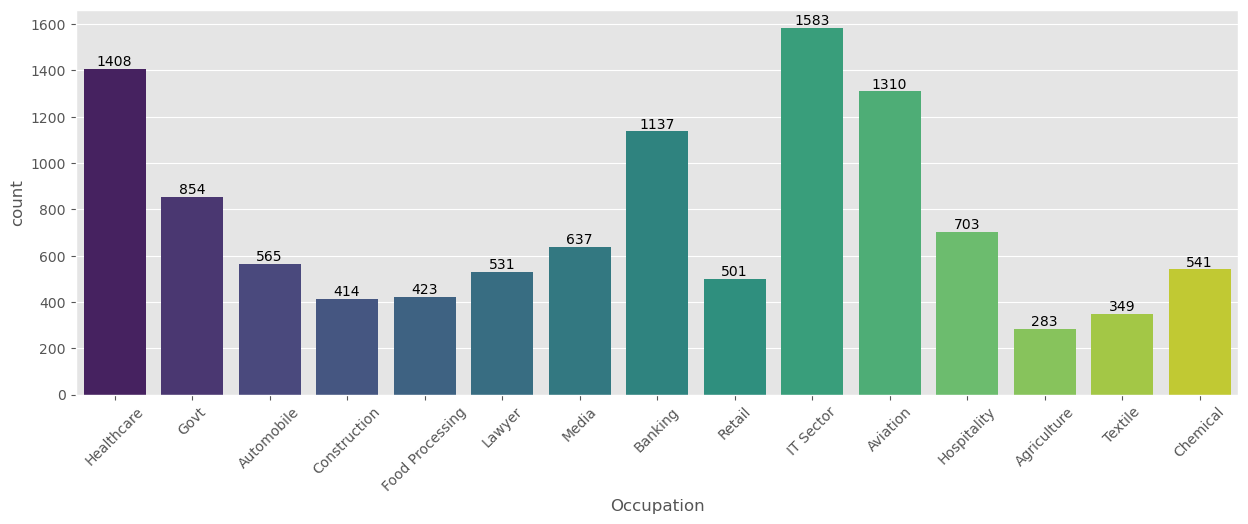

In [25]:
# plot a bar chart to see Orders by occupation
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
ax = sns.countplot(data = df, x="Occupation", palette = "viridis")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20060\1652990937.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_occ, x='Occupation', y='Amount', ax=ax1, palette='viridis')


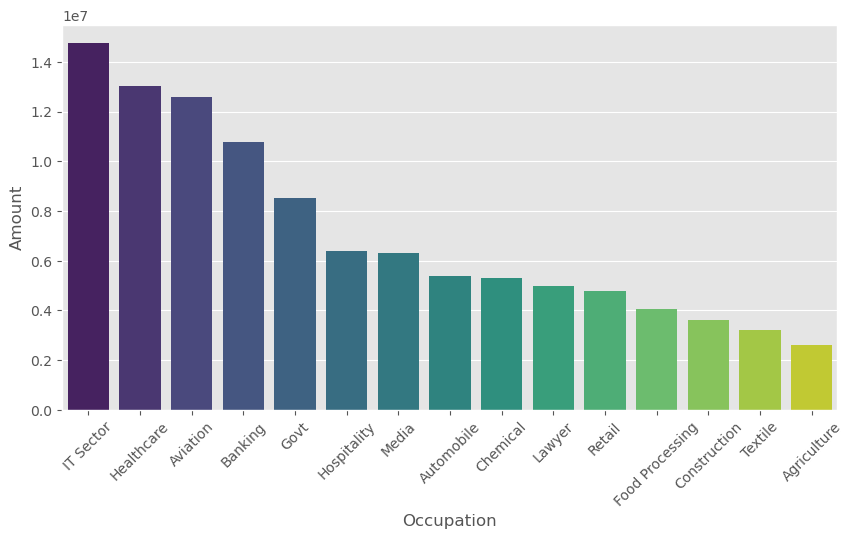

In [29]:
fig1, ax1 = plt.subplots(figsize=(10,5))
sales_occ= df.groupby('Occupation', as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False)
sns.axes_style("darkgrid")
sns.barplot(data=sales_occ, x='Occupation', y='Amount', ax=ax1, palette='viridis')
plt.xticks(rotation=45)
plt.show()

##### IT Sector people purchase orders more than others and purchasing power of IT Sector is also greater.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20060\879472345.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=orders_pid, x='Product_ID', y='Orders', palette='Set2')


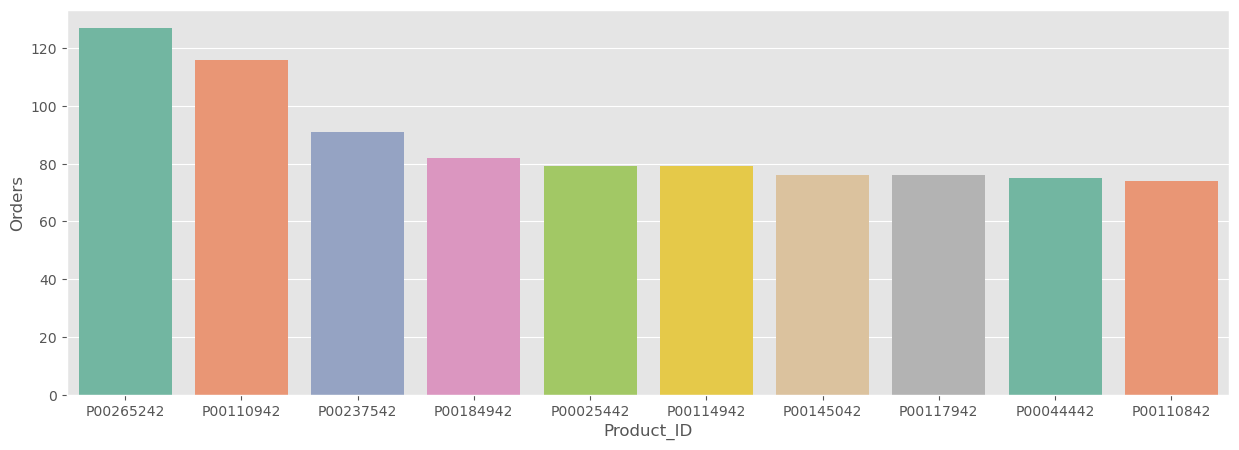

In [30]:
orders_pid= df.groupby('Product_ID', as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(data=orders_pid, x='Product_ID', y='Orders', palette='Set2')
plt.show()

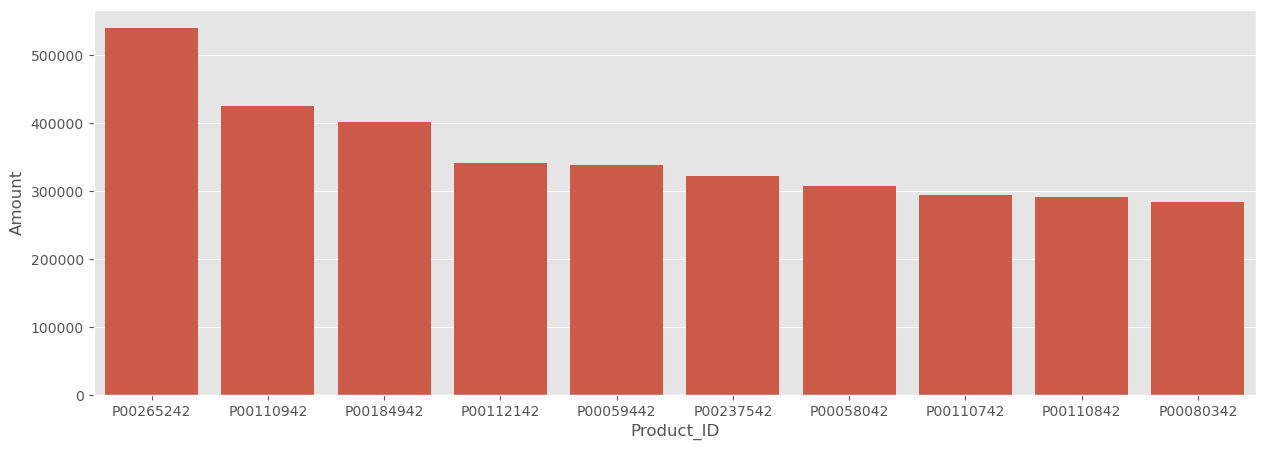

In [31]:
orders_pid= df.groupby('Product_ID', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(data=orders_pid, x='Product_ID', y='Amount')
plt.show()

### Conclusion:

##### Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products*